# Visualization Example

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
DIR = "/workspace/nflbigdatabowl2023"
sys.path.append(DIR)

In [3]:
import math
from ast import literal_eval

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from src.metrics.pocket_area.base import PocketArea
from src.pipeline.flows.main import main_flow

In [4]:
_ = main_flow(max_plays=3)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/contextlib.py:120: SAWarning: Skipped unsupported reflection of expression-based index ix_flow_run__coalesce_start_time_expected_start_time_desc
  next(self.gen)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/contextlib.py:120: SAWarning: Skipped unsupported reflection of expression-based index ix_flow_run__coalesce_start_time_expected_start_time_asc
  next(self.gen)


20:27:35.276 | INFO    | prefect.engine - Created flow run 'ruby-sparrow' for flow 'main-flow'

20:27:35.519 | INFO    | Flow run 'ruby-sparrow' - Created task run 'read_csv-3609c996-0' for task 'read_csv'

20:27:35.522 | INFO    | Flow run 'ruby-sparrow' - Executing 'read_csv-3609c996-0' immediately...

20:27:35.873 | INFO    | Task run 'read_csv-3609c996-0' - Finished in state Completed()

20:27:35.913 | INFO    | Flow run 'ruby-sparrow' - Created task run 'read_csv-3609c996-1' for task 'read_csv'

20:27:35.916 | INFO    | Flow run 'ruby-sparrow' - Executing 'read_csv-3609c996-1' immediately...

20:27:38.196 | INFO    | Task run 'read_csv-3609c996-1' - Finished in state Completed()

20:27:40.504 | INFO    | Flow run 'ruby-sparrow' - Created task run 'transform_to_frames-3446c324-0' for task 'transform_to_frames'

20:27:40.508 | INFO    | Flow run 'ruby-sparrow' - Executing 'transform_to_frames-3446c324-0' immediately...

20:27:40.716 | INFO    | Task run 'transform_to_frames-3446c324-0' - Finished in state Completed()

20:27:40.756 | INFO    | Flow run 'ruby-sparrow' - Created task run 'transform_to_records_per_frame-823b8998-0' for task 'transform_to_records_per_frame'

20:27:40.769 | INFO    | Flow run 'ruby-sparrow' - Executing 'transform_to_records_per_frame-823b8998-0' immediately...

20:27:41.045 | INFO    | Task run 'transform_to_records_per_frame-823b8998-0' - Finished in state Completed()

20:27:41.132 | INFO    | Flow run 'ruby-sparrow' - Created task run 'calculate_pocket_area-cc18ef62-0' for task 'calculate_pocket_area'

20:27:41.136 | INFO    | Flow run 'ruby-sparrow' - Submitted task run 'calculate_pocket_area-cc18ef62-0' for execution.

20:27:41.189 | INFO    | Flow run 'ruby-sparrow' - Created task run 'calculate_pocket_area-cc18ef62-1' for task 'calculate_pocket_area'

20:27:41.203 | INFO    | Flow run 'ruby-sparrow' - Submitted task run 'calculate_pocket_area-cc18ef62-1' for execution.

20:27:41.334 | INFO    | Flow run 'ruby-sparrow' - Created task run 'union_dataframes-8a4e3d8f-0' for task 'union_dataframes'

20:27:41.336 | INFO    | Flow run 'ruby-sparrow' - Executing 'union_dataframes-8a4e3d8f-0' immediately...

20:27:41.403 | INFO    | Task run 'calculate_pocket_area-cc18ef62-0' - Finished in state Completed()

20:27:41.468 | INFO    | Task run 'calculate_pocket_area-cc18ef62-1' - Finished in state Completed()

20:27:41.576 | INFO    | Task run 'union_dataframes-8a4e3d8f-0' - Finished in state Completed()

20:27:41.630 | INFO    | Flow run 'ruby-sparrow' - Created task run 'write_csv-386fe2af-0' for task 'write_csv'

20:27:41.632 | INFO    | Flow run 'ruby-sparrow' - Executing 'write_csv-386fe2af-0' immediately...

20:27:41.813 | INFO    | Task run 'write_csv-386fe2af-0' - Finished in state Completed()

20:27:41.846 | INFO    | Flow run 'ruby-sparrow' - Created task run 'write_csv-386fe2af-1' for task 'write_csv'

20:27:41.848 | INFO    | Flow run 'ruby-sparrow' - Executing 'write_csv-386fe2af-1' immediately...

20:27:41.981 | INFO    | Task run 'write_csv-386fe2af-1' - Finished in state Completed()

20:27:42.029 | INFO    | Flow run 'ruby-sparrow' - Finished in state Completed('All states completed.')

In [5]:
df_tracking_all = pd.read_csv(f"{DIR}/data/raw/week1.csv")
df_pff_all = pd.read_csv(f"{DIR}/data/raw/pffScoutingData.csv")

df_frame_records_all = pd.read_csv(f"{DIR}/data/outputs/frame_records.csv")
df_frame_records_all["records"] = df_frame_records_all["records"].apply(literal_eval)

df_areas_all = pd.read_csv(f"{DIR}/data/outputs/pocket_areas.csv")
df_areas_all["pocket"] = df_areas_all["pocket"].apply(literal_eval)

In [6]:
game_id = 2021090900
play_id = 97
query = f"gameId == {game_id} and playId == {play_id}"


df_frame_records = df_frame_records_all.query(query)
df_area = df_areas_all.query(query)
df_pff = df_pff_all.query(query)
df_tracking = df_tracking_all.query(query).merge(df_pff, on=["gameId", "playId"], how="left")

In [7]:
df_tracking.columns

Index(['gameId', 'playId', 'nflId_x', 'frameId', 'time', 'jerseyNumber',
       'team', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event',
       'nflId_y', 'pff_role', 'pff_positionLinedUp', 'pff_hit', 'pff_hurry',
       'pff_sack', 'pff_beatenByDefender', 'pff_hitAllowed',
       'pff_hurryAllowed', 'pff_sackAllowed', 'pff_nflIdBlockedPlayer',
       'pff_blockType', 'pff_backFieldBlock'],
      dtype='object')

In [8]:
PocketArea(df_area["pocket"][0])

PocketArea(area={'area': 104.72938933713064, 'metadata': {'vertices': None, 'radius': 5.773768266911996}}, metadata=PocketAreaMetadata(vertices=None, radius=None))

In [9]:
def gen_frames(input_rows):
    rows = []
    curr_frame = 1
    for row in input_rows:
        frame = row["frameId"]
        if curr_frame == frame:
            rows.append(row)
        else:
            # Stop adding to this frame and yield it
            yield rows
            # Reset for the next frame
            curr_frame = frame
            rows = [row]
    # Yield the last frame
    yield rows
    # Yield terminal value
    yield None

    
def animate_play(df_play_tracking_normalized, df_area):
    """Sorry for the unreadable code, I'll clean it up later."""
    team_options = list({team for team in df_play_tracking_normalized["team"].unique() if team != "football"})
    team_a = df_play_tracking_normalized["team"] == team_options[0]
    team_b = df_play_tracking_normalized["team"] == team_options[1]

    x = df_play_tracking_normalized["x"]
    y = df_play_tracking_normalized["y"]
    g_min = min(x.min(), y.min())
    g_max = max(x.max(), y.max())

    ratio = 0.4
    dim = ratio * (g_max - g_min)
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(dim, dim)

    ax.axvline(0, color="gray", dashes=[5, 1])
    ax.axhline(0, color="gray", dashes=[5, 1])

    trails = pd.DataFrame(df_play_tracking_normalized.query("team != 'football' and pff_role in ('Pass', 'Pass Block', 'Pass Rush')"))
    trails["color"] = trails["team"].apply(lambda team: "red" if team == team_options[0] else "blue")

    ax.scatter(trails["x"], trails["y"], s=1, color=trails["color"])

    ax.set_xlim(g_min - 1, g_max + 1)
    ax.set_ylim(g_min - 1, g_max + 1)

    df_sorted = df_play_tracking_normalized.sort_values(by="frameId", ascending=True)
    rows = []
    for r in df_sorted.to_dict(orient="records"):
        team = r["team"]
        if team == "football":
            row = {
                "frameId": r["frameId"],
                "pid": "football",
                "x": r["x"],
                "y": r["y"],
            }
            rows.append(row)
            continue
        jersey = str(int(r["jerseyNumber"]))
        row = {
            "frameId": r["frameId"],
            "pid": f"{team} {jersey}",
            "j": jersey,
            "x": r["x"],
            "y": r["y"],
            "o": r["o"],
            "dir": r["dir"],
            "c": "red" if team == team_options[0] else "blue",
        }
        rows.append(row)

    frame_list = list(gen_frames(rows))

    diameter = 1.125
    font_size = 12 * diameter
    radius = 0.5 * diameter
    y_offset = 0.175 * diameter

    ball = None
    jerseys = {}
    numbers = {}
    orientations = {}
    directions = {}
    for p in frame_list[0]:
        pid = p["pid"]
        x, y = p["x"], p["y"]

        if pid == "football":
            ball = plt.Circle((x, y), radius * 0.5, color="brown")
            continue

        x_offset = (0.375 if len(p["j"]) > 1 else 0.2) * diameter

        degrees = p["o"]
        radians = math.radians((-1 * degrees) + 90)
        dx = math.cos(radians)
        dy = math.sin(radians)
        orientation = ax.arrow(x, y, dx, dy, color=p["c"])
        orientations[pid] = orientation

        degrees = p["dir"]
        radians = math.radians((-1 * degrees) + 90)
        dx = math.cos(radians)
        dy = math.sin(radians)
        direction = ax.arrow(x, y, dx, dy, color="lightgray")
        directions[pid] = direction

        circle = plt.Circle((x, y), radius, color=p["c"])
        ax.add_patch(circle)
        jerseys[pid] = circle

        text = ax.text(x - x_offset, y - y_offset, p["j"], fontsize=font_size, color="white")
        numbers[pid] = text

    ax.add_patch(ball)

    
    def animate(i):
        if i >= len(frame_list):
            return ()
        frame_rows = frame_list[i] or []
        for row in frame_rows:
            pid = row["pid"]
            x, y = row["x"], row["y"]

            if pid == "football":
                ball.center = x, y
                continue

            j = jerseys[pid]    
            j.center = x, y

            n = numbers[pid]
            x_offset = (0.375 if len(row["j"]) > 1 else 0.2) * diameter
            n.set_x(x - x_offset)
            n.set_y(y - y_offset)

            o = orientations[pid]
            degrees = row["o"]
            radians = math.radians((-1 * degrees) + 90)
            dx = math.cos(radians)
            dy = math.sin(radians)
            o.set_data(x=x, y=y, dx=dx, dy=dy)

            d = directions[pid]
            degrees = row["dir"]
            radians = math.radians((-1 * degrees) + 90)
            dx = math.cos(radians)
            dy = math.sin(radians)
            d.set_data(x=x, y=y, dx=dx, dy=dy)

        return (*jerseys.values(), *numbers.values(), *orientations.values(), *directions.values())


    ani = animation.FuncAnimation(fig, animate, frames=range(len(frame_list) + 1), interval=100, blit=True)
    plt.close("all")
    video = ani.to_html5_video()
    return HTML(video)

In [11]:
animate_play(df_tracking, df_area)

In [51]:
def plot_frame(df_play_tracking_normalized, frame_id):
    """Sorry for the unreadable code, I'll clean it up later."""
    df_play_tracking_normalized = df_play_tracking_normalized.query(f"frameId == {frame_id} and pff_role in ('Pass', 'Pass Block', 'Pass Rush')")
    team_options = list({team for team in df_play_tracking_normalized["team"].unique() if team != "football"})
    team_a = df_play_tracking_normalized["team"] == team_options[0]
    team_b = df_play_tracking_normalized["team"] == team_options[1]

    x = df_play_tracking_normalized["x"]
    y = df_play_tracking_normalized["y"]
    x_min = x.min()
    x_max = x.max()
    y_min = y.min()
    y_max = y.max()

    ratio = 0.4
    x_dim = ratio * (x_max - x_min)
    y_dim = ratio * (y_max - y_min)
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(x_dim, y_dim)

    ax.axvline(0, color="gray", dashes=[5, 1])
    ax.axhline(0, color="gray", dashes=[5, 1])

    ax.set_xlim(x_min - 1, x_max + 1)
    ax.set_ylim(y_min - 1, y_max + 1)

    rows = []
    for r in df_play_tracking_normalized.to_dict(orient="records"):
        team = r["team"]
        if team == "football":
            row = {
                "frameId": r["frameId"],
                "pid": "football",
                "x": r["x"],
                "y": r["y"],
            }
            rows.append(row)
            continue
        jersey = str(int(r["jerseyNumber"]))
        row = {
            "frameId": r["frameId"],
            "pid": f"{team} {jersey}",
            "j": jersey,
            "x": r["x"],
            "y": r["y"],
            "o": r["o"],
            "dir": r["dir"],
            "c": "red" if team == team_options[0] else "blue",
        }
        rows.append(row)

    frame_list = [rows]

    diameter = 1.125
    font_size = 12 * diameter
    radius = 0.5 * diameter
    y_offset = 0.175 * diameter

    ball = None
    jerseys = {}
    numbers = {}
    orientations = {}
    directions = {}
    for p in frame_list[0]:
        pid = p["pid"]
        # x, y = 0, 0
        x, y = p["x"], p["y"]

        if pid == "football":
            ball = plt.Circle((x, y), radius * 0.5, color="brown")
            continue

        x_offset = (0.375 if len(p["j"]) > 1 else 0.2) * diameter

        degrees = p["o"]
        radians = math.radians((-1 * degrees) + 90)
        dx = math.cos(radians)
        dy = math.sin(radians)
        orientation = ax.arrow(x, y, dx, dy, color=p["c"])
        orientations[pid] = orientation

        degrees = p["dir"]
        radians = math.radians((-1 * degrees) + 90)
        dx = math.cos(radians)
        dy = math.sin(radians)
        direction = ax.arrow(x, y, dx, dy, color="lightgray")
        directions[pid] = direction

        circle = plt.Circle((x, y), radius, color=p["c"])
        ax.add_patch(circle)
        jerseys[pid] = circle

        text = ax.text(x - x_offset, y - y_offset, p["j"], fontsize=font_size, color="white")
        numbers[pid] = text

    ax.add_patch(ball)

    
    def animate(i):
        if i >= len(frame_list):
            return ()
        frame_rows = frame_list[i] or []
        for row in frame_rows:
            pid = row["pid"]
            x, y = row["x"], row["y"]

            if pid == "football":
                ball.center = x, y
                continue

            j = jerseys[pid]    
            j.center = x, y

            n = numbers[pid]
            x_offset = (0.375 if len(row["j"]) > 1 else 0.2) * diameter
            n.set_x(x - x_offset)
            n.set_y(y - y_offset)

            o = orientations[pid]
            degrees = row["o"]
            radians = math.radians((-1 * degrees) + 90)
            dx = math.cos(radians)
            dy = math.sin(radians)
            o.set_data(x=x, y=y, dx=dx, dy=dy)

            d = directions[pid]
            degrees = row["dir"]
            radians = math.radians((-1 * degrees) + 90)
            dx = math.cos(radians)
            dy = math.sin(radians)
            d.set_data(x=x, y=y, dx=dx, dy=dy)

        return (*jerseys.values(), *numbers.values(), *orientations.values(), *directions.values())


    animate(0)
    plt.show()

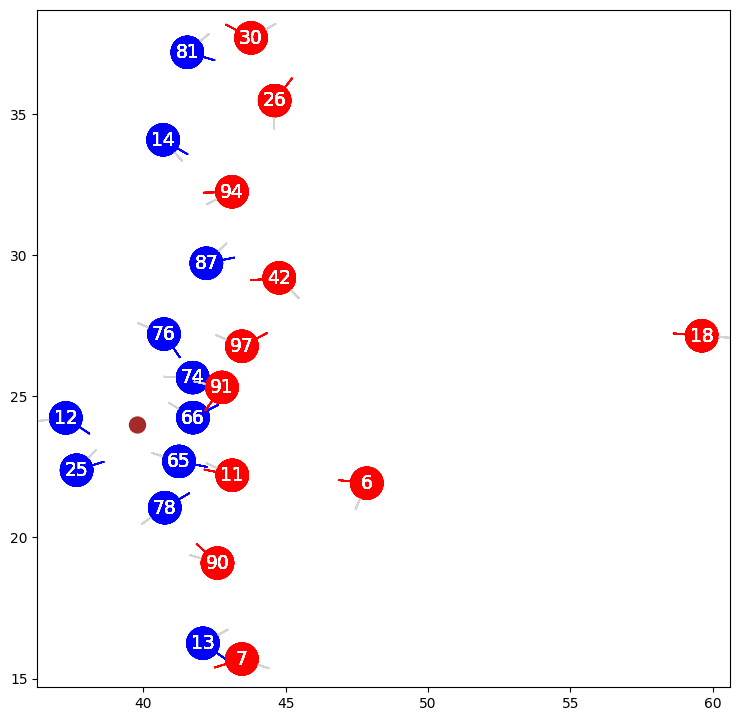

In [52]:
plot_frame(df_tracking, frame_id=10)